# **Level 3 Task 1 – Restaurant Reviews Analysis**


---


In this task, I analyzed restaurant reviews to extract the most common positive and negative keywords using NLP techniques. I also calculated the average review length and explored its relationship with the restaurant’s aggregate rating. This helped identify how review verbosity correlates with customer satisfaction.

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset.csv")

In [3]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df['Rating text'].unique()


array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [5]:
df['Rating text'] = df['Rating text'].astype(str)
df['Rating text_cleaned'] = df['Rating text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

In [6]:
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['Rating text_cleaned'].apply(lambda x: [word for word in x.split() if word not in stop_words])

In [7]:
all_words = [word for tokens in df['Tokens'] for word in tokens]
word_freq = Counter(all_words)
print("Most common words:", word_freq.most_common(10))

Most common words: [('average', 3737), ('good', 3179), ('rated', 2148), ('excellent', 301), ('poor', 186)]


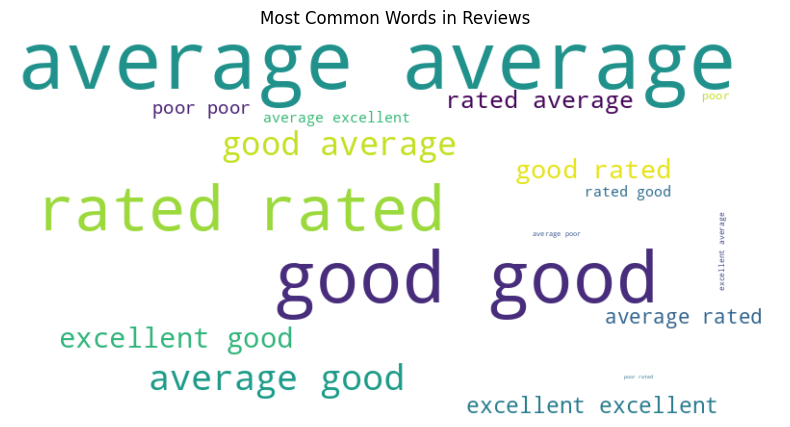

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()

In [9]:
df['Review_length'] = df['Rating text'].apply(len)
avg_length = df['Review_length'].mean()
print(f"Average Review Length: {avg_length:.2f} characters")

Average Review Length: 7.02 characters


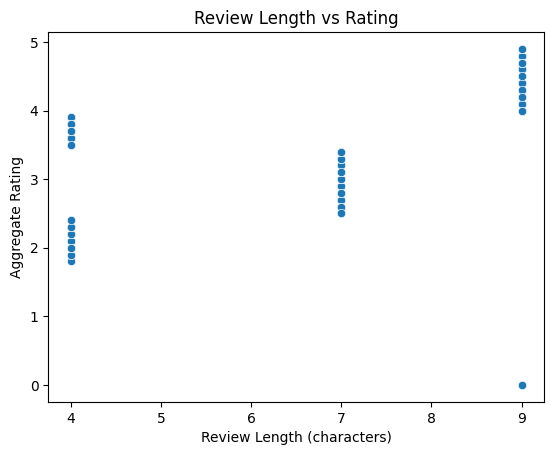

In [10]:
sns.scatterplot(x='Review_length', y='Aggregate rating', data=df)
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (characters)")
plt.ylabel("Aggregate Rating")
plt.show()

# **Level 3 Task 2 – Votes Analysis**


---


In this task, I identified the restaurants with the highest and lowest number of customer votes and analyzed whether there is a correlation between the number of votes and the aggregate ratings of restaurants. Using statistical methods and visualizations, I explored how customer voting behavior reflects a restaurant’s popularity and perceived quality. This helped uncover patterns in customer engagement and its impact on rating trends.



In [11]:
print("Vote column basic stats:")
print(df['Votes'].describe())

Vote column basic stats:
count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64


In [12]:
max_votes_row = df.loc[df['Votes'].idxmax()]
min_votes_row = df.loc[df['Votes'].idxmin()]


In [13]:
print("\n📌 Restaurant with Highest Votes:")
print(f"Name: {max_votes_row['Restaurant Name']}, Votes: {max_votes_row['Votes']}, Rating: {max_votes_row['Aggregate rating']}")

print("\n📌 Restaurant with Lowest Votes:")
print(f"Name: {min_votes_row['Restaurant Name']}, Votes: {min_votes_row['Votes']}, Rating: {min_votes_row['Aggregate rating']}")



📌 Restaurant with Highest Votes:
Name: Toit, Votes: 10934, Rating: 4.8

📌 Restaurant with Lowest Votes:
Name: Cantinho da Gula, Votes: 0, Rating: 0.0


In [14]:
votes_rating_df = df[['Votes', 'Aggregate rating']].dropna()
votes_rating_df = votes_rating_df[votes_rating_df['Votes'] > 0]

In [15]:
correlation = votes_rating_df['Votes'].corr(votes_rating_df['Aggregate rating'])
print(f"\n📊 Correlation between Votes and Rating: {correlation:.4f}")


📊 Correlation between Votes and Rating: 0.3004


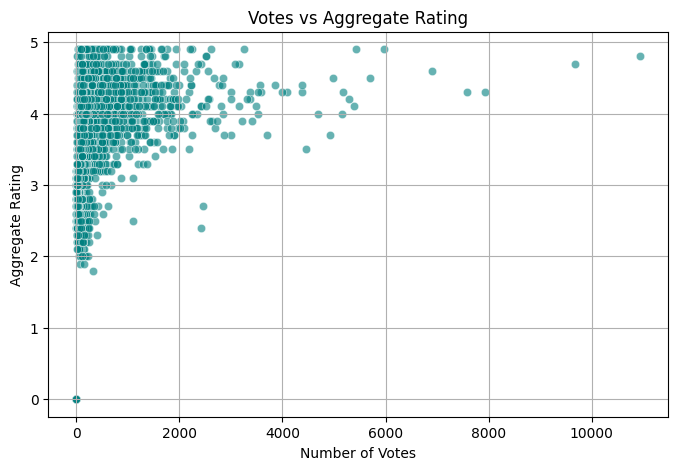

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=votes_rating_df, x='Votes', y='Aggregate rating', alpha=0.6, color='teal')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.show()

# **Level 3 Task 3 – Price Range vs. Online Delivery and Table Booking**

---



In this task, I analyzed whether there is a relationship between the price range of restaurants and their availability of online delivery and table booking services. By grouping and comparing price categories, I investigated if higher-priced restaurants are more likely to provide these convenience features. The analysis provided insights into how pricing influences service offerings and customer accessibility in the restaurant industry.



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df.columns = df.columns.str.strip()

In [19]:
print("Price Ranges:", df['Price range'].unique())
print("Online Delivery options:", df['Has Online delivery'].unique())
print("Table Booking options:", df['Has Table booking'].unique())

Price Ranges: [3 4 2 1]
Online Delivery options: ['No' 'Yes']
Table Booking options: ['Yes' 'No']


In [20]:
online_delivery_group = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100

<Figure size 800x500 with 0 Axes>

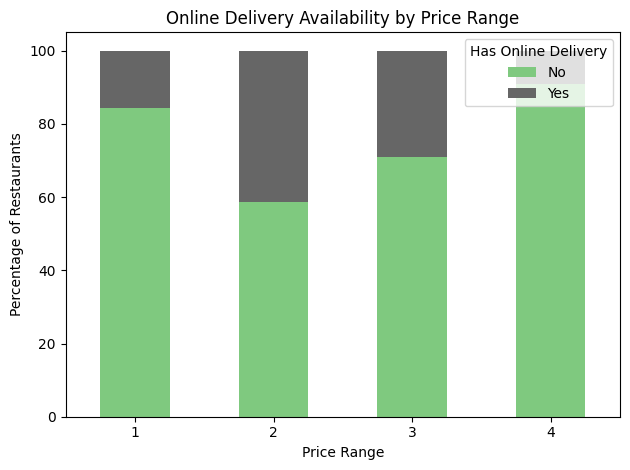

In [21]:
plt.figure(figsize=(8, 5))
online_delivery_group.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.legend(title='Has Online Delivery', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
table_booking_group = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0) * 100

<Figure size 800x500 with 0 Axes>

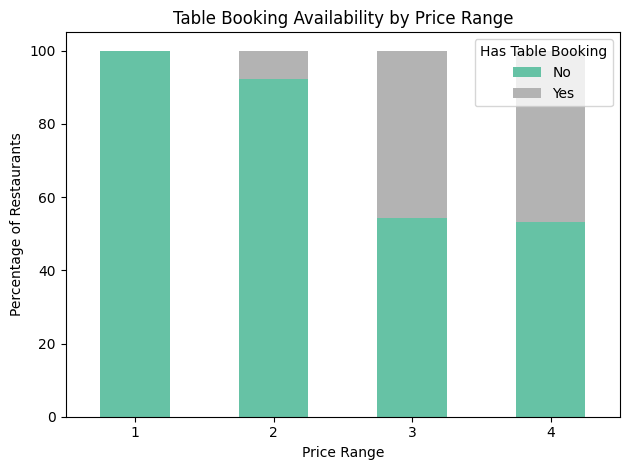

In [23]:
plt.figure(figsize=(8, 5))
table_booking_group.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.legend(title='Has Table Booking', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()